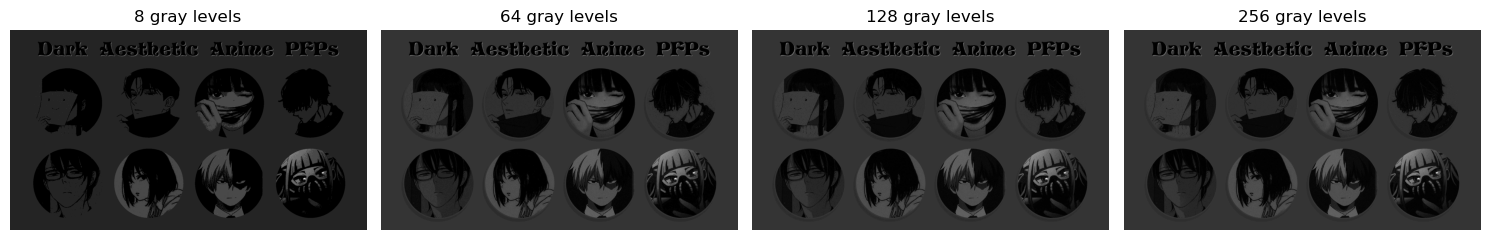

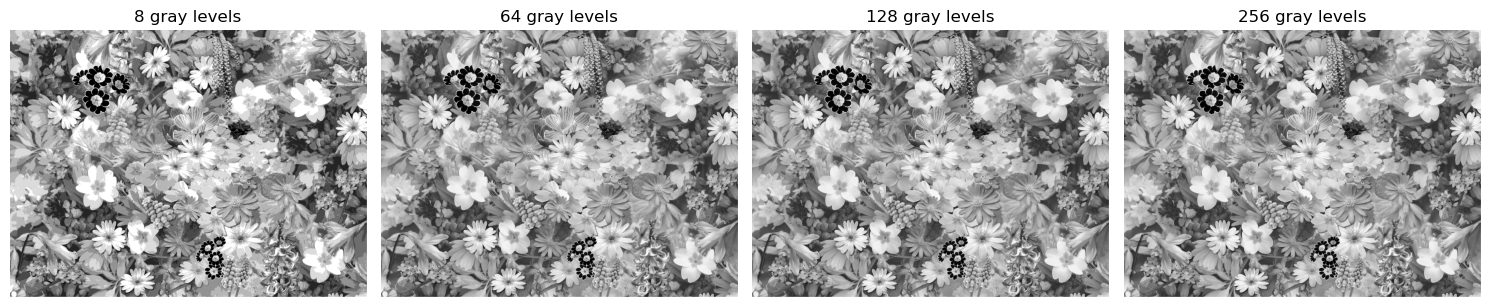

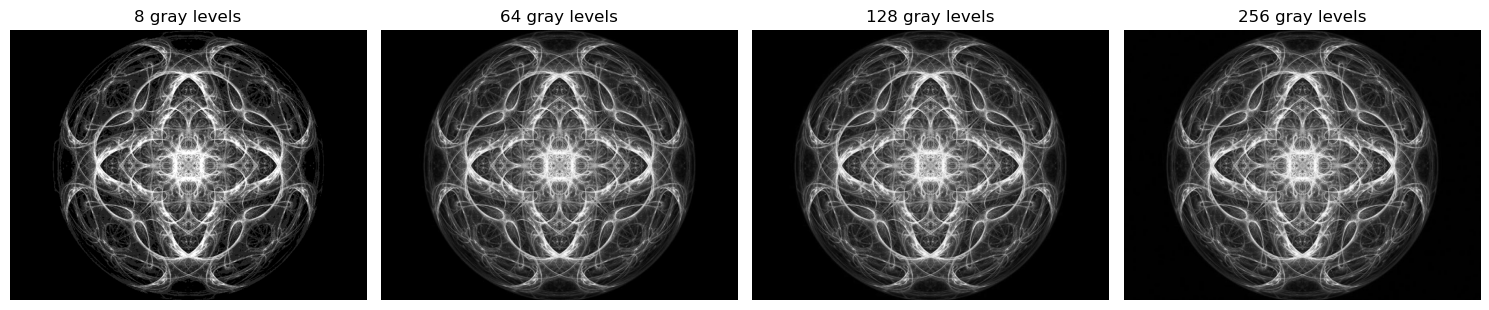

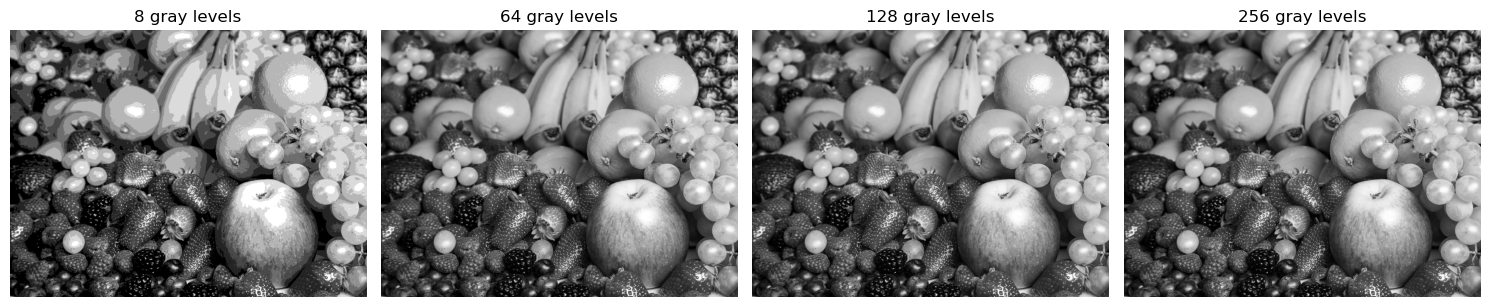

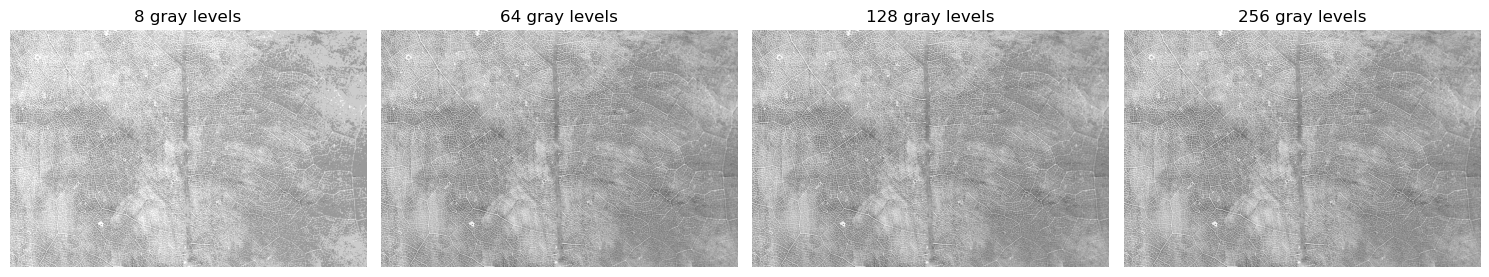

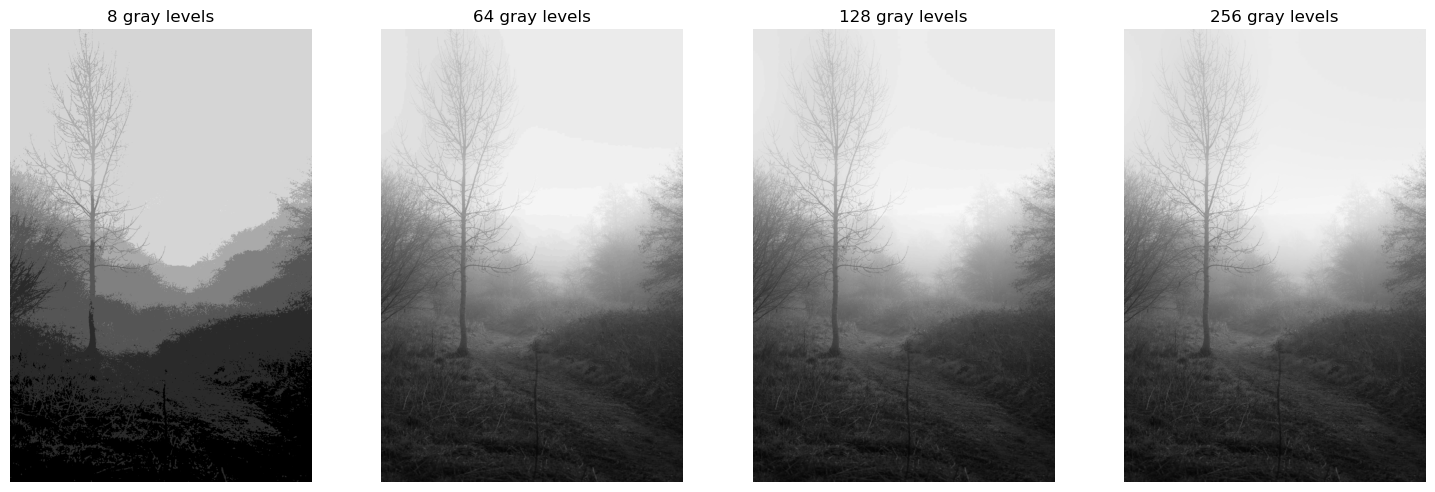

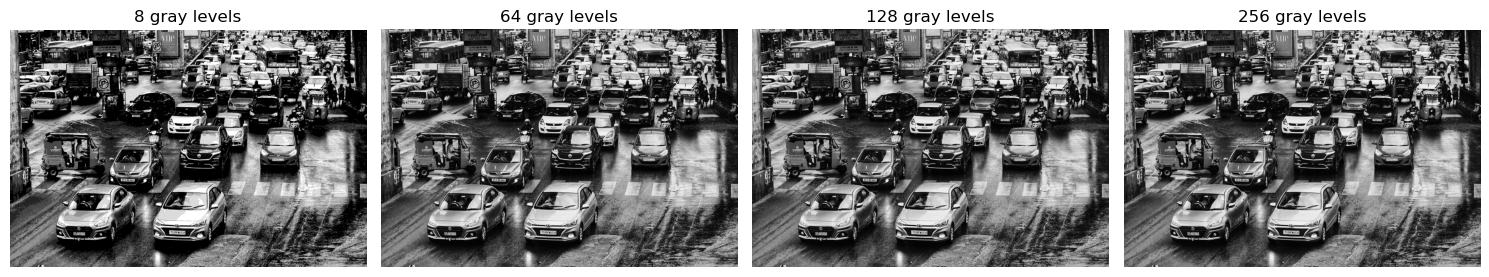

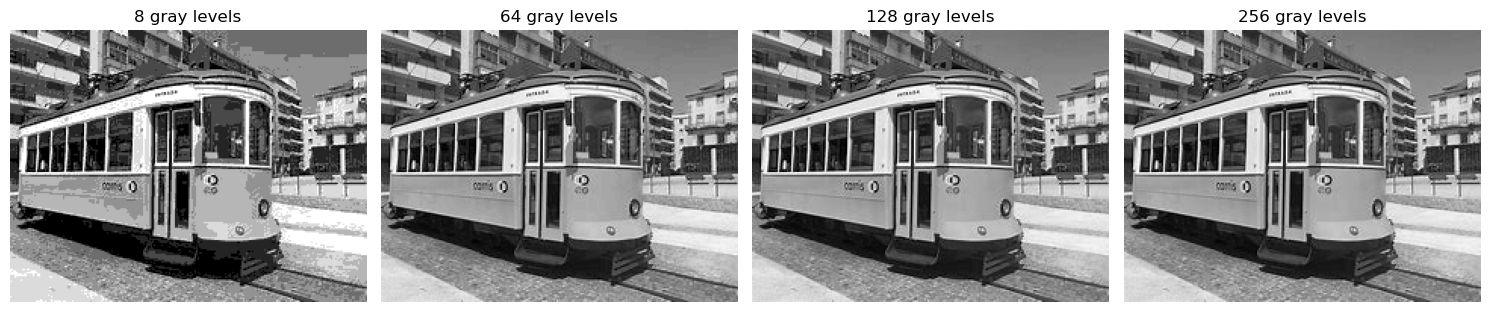

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_gray_levels(img, levels):
    step = 256 / levels
    quantized = (img / step).astype(np.uint8)
    quantized = (quantized * step).astype(np.uint8)
    return quantized

def process_display_and_save_image(image_path, output_folder):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Couldn't load the image {image_path}.")
        return

    gray_levels = [8, 64, 128, 256]
    
    # Display in Jupyter Notebook
    plt.figure(figsize=(15, 5))
    
    for index, levels in enumerate(gray_levels, 1):
        processed_img = reduce_gray_levels(img, levels)
        
        # Display in Jupyter Notebook
        plt.subplot(1, 4, index)
        plt.imshow(processed_img, cmap='gray')
        plt.title(f"{levels} gray levels")
        plt.axis('off')
        
        # Save to the output folder
        base_name = os.path.basename(image_path)
        file_name_without_extension = os.path.splitext(base_name)[0]
        new_file_name = f"{file_name_without_extension}_{levels}_levels.jpg"
        
        output_path = os.path.join(output_folder, new_file_name)
        cv2.imwrite(output_path, processed_img)
    
    plt.tight_layout()
    plt.show()

# Ensure the output folder exists, if not create it
output_folder = "processed_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

image_list = ["../original_images/cartoon.jpg", "../original_images/flower.jpg", "../original_images/fractal.jpeg", "../original_images/fruit.jpg", 
              "../original_images/scenery1.jpg", "../original_images/scenery2.jpg", "../original_images/traffic.jpg", "../original_images/tram.jpg"]

for image in image_list:
    process_display_and_save_image(image, output_folder)
